<a href="https://colab.research.google.com/github/shravanireguri/ML-project/blob/main/Child_Malnutrition_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib
import numpy as np
import pickle
import gradio as gr

In [ ]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.2 MB/s eta 0

In [ ]:
df = pd.read_excel('/content/JME_Country_Estimates_April_2021.xlsx', sheet_name = 'Survey Estimates')
df.shape

(997, 29)

In [ ]:
df.drop(['United Nations Region', 'United Nations Sub-Region', 'SDG Region', 'UNICEF Region', 'UNICEF Sub-Region', 'WHO Region', 'World Bank Region', 'LIFD', 'UNICEF Survey ID', 'WHO Global Database Number', 'WHZ Survey Sample (N)', 'Notes', 'Report Author', 'Source', 'Short Source', 'Fieldwork Period'], axis = 1, inplace = True)


In [ ]:
df.drop(["U5 Population ('000s)"], axis = 1, inplace = True)

In [ ]:
df.head()

,ISO code,Country and areas,Survey year,Year*,World Bank Income Classification,LDC,LLDC or SIDS,Severe Wasting,Wasting,Overweight,Stunting,Underweight
0,AFG,AFGHANISTAN,1997,1997,Low Income,Least Developed Countries (LDCs),Landlocked developing countries (LLDCs),NaN,18.2,6.5,53.2,44.9
1,AFG,AFGHANISTAN,2004,2004,Low Income,Least Developed Countries (LDCs),Landlocked developing countries (LLDCs),3.5,8.6,4.6,59.3,32.9
2,AFG,AFGHANISTAN,2013,2013,Low Income,Least Developed Countries (LDCs),Landlocked developing countries (LLDCs),4.0,9.5,5.3,40.4,24.6
3,AFG,AFGHANISTAN,2018,2018,Low Income,Least Developed Countries (LDCs),Landlocked developing countries (LLDCs),1.6,5.1,4.1,38.2,19.1
4,AGO,ANGOLA,1996,1996,Lower Middle Income,Least Developed Countries (LDCs),NaN,1.8,7.7,1.7,61.1,36.2


In [ ]:
df.isnull().sum()

ISO code                              0
Country and areas                     0
Survey year                           0
Year*                                 0
World Bank Income Classification      0
LDC                                 639
LLDC or SIDS                        639
Severe Wasting                      213
Wasting                              45
Overweight                          125
Stunting                             35
Underweight                          22
dtype: int64

In [ ]:
df['LDC'].unique()

array(['Least Developed Countries (LDCs)', nan], dtype=object)

In [ ]:
df['World Bank Income Classification'].unique()

array(['Low Income', 'Lower Middle Income', 'Upper Middle Income',
       'High Income'], dtype=object)

In [ ]:
df['LDC'] = df.apply(lambda row : 'Least Developed Countries (LDCs)' if pd.isnull(row['LDC']) and (row['World Bank Income Classification'] == 'Low Income' or row['World Bank Income Classification'] == 'Lower Middle Income') else 'Non Least Developed Countries (NDCs)', axis = 1)

In [ ]:
df.isnull().sum()

ISO code                              0
Country and areas                     0
Survey year                           0
Year*                                 0
World Bank Income Classification      0
LDC                                   0
LLDC or SIDS                        639
Severe Wasting                      213
Wasting                              45
Overweight                          125
Stunting                             35
Underweight                          22
dtype: int64

In [ ]:
df['LDC'].unique()

array(['Non Least Developed Countries (NDCs)',
       'Least Developed Countries (LDCs)'], dtype=object)

In [ ]:
for x in ['LLDC or SIDS']:
  df[x].fillna(df[x].mode()[0], inplace = True)


In [ ]:
df['LLDC or SIDS'].unique()

array(['Landlocked developing countries (LLDCs)',
       'Small island developing States (SIDS)'], dtype=object)

In [ ]:
for x in ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']:
  df[x].fillna(df[x].mean(), inplace = True)


In [ ]:
df.isnull().sum()

ISO code                            0
Country and areas                   0
Survey year                         0
Year*                               0
World Bank Income Classification    0
LDC                                 0
LLDC or SIDS                        0
Severe Wasting                      0
Wasting                             0
Overweight                          0
Stunting                            0
Underweight                         0
dtype: int64

In [ ]:
df.shape

(997, 12)

In [ ]:
df['isMalnourished'] = df.apply(lambda row : 1 if row['Stunting'] < 10 or row['Wasting'] < 5 or row['Overweight'] > 10 or row['Underweight'] < 5 else 0 , axis = 1)

In [ ]:
df.head()

,ISO code,Country and areas,Survey year,Year*,World Bank Income Classification,LDC,LLDC or SIDS,Severe Wasting,Wasting,Overweight,Stunting,Underweight,isMalnourished
0,AFG,AFGHANISTAN,1997,1997,Low Income,Non Least Developed Countries (NDCs),Landlocked developing countries (LLDCs),2.003316,18.2,6.5,53.2,44.9,0
1,AFG,AFGHANISTAN,2004,2004,Low Income,Non Least Developed Countries (NDCs),Landlocked developing countries (LLDCs),3.500000,8.6,4.6,59.3,32.9,0
2,AFG,AFGHANISTAN,2013,2013,Low Income,Non Least Developed Countries (NDCs),Landlocked developing countries (LLDCs),4.000000,9.5,5.3,40.4,24.6,0
3,AFG,AFGHANISTAN,2018,2018,Low Income,Non Least Developed Countries (NDCs),Landlocked developing countries (LLDCs),1.600000,5.1,4.1,38.2,19.1,0
4,AGO,ANGOLA,1996,1996,Lower Middle Income,Non Least Developed Countries (NDCs),Landlocked developing countries (LLDCs),1.800000,7.7,1.7,61.1,36.2,0


In [ ]:
df['isMalnourished'].unique()

array([0, 1])

In [ ]:
df.isMalnourished.value_counts()

1    501
0    496
Name: isMalnourished, dtype: int64

In [ ]:
le_LDC = LabelEncoder()
le_LLDCorSIDS = LabelEncoder()
le_WorldBankIncomeClassification = LabelEncoder()
le_CountyAndAreas = LabelEncoder()

In [ ]:
df['LDC'] = le_LDC.fit_transform(df['LDC'])

In [ ]:
df['LLDC or SIDS'] = le_LLDCorSIDS.fit_transform(df['LLDC or SIDS'])

In [ ]:
df['World Bank Income Classification'] = le_WorldBankIncomeClassification.fit_transform(df['World Bank Income Classification'])

In [ ]:
df['Country and areas'] = le_CountyAndAreas.fit_transform(df['Country and areas'])

In [ ]:
print(df['LDC'].unique())
print(df['LLDC or SIDS'].unique())
df['World Bank Income Classification'].unique()
df['Country and areas'].unique()

[1 0]
[0 1]


array([  0,   3,   1,   4,   5,   6,   7,  23,  12,  14,  22,   9,  21,
         8,  17,  11,  13,  16,  19,  10,  20,  15,  18,  28,  27,  30,
        31,  38,  26,  40,  34,  32,  33,  24,  35,  36,  37,  55,  41,
        42,   2,  43,  44,  47,  48,  50,  51,  52,  54,  56,  59,  53,
        60,  46,  57,  58,  61,  63,  62,  65,  64,  66,  67,  68,  70,
        69,  71,  72,  75,  25,  73, 113,  74,  76,  77,  79,  80, 117,
       130,  78,  92, 114,  81,  84,  89,  86, 102,  85,  94,  91,  90,
        93,  87,  88,  82,  83,  95, 100, 101,  99,  98,  97,  96, 103,
       104, 105, 108, 109, 106, 110,  39, 111, 107, 131, 112, 115, 116,
       120, 132, 121, 125, 126, 124,  45, 127, 122, 129, 119, 133,  49,
       123, 134,  29, 138, 136, 135, 143, 137, 139, 140, 141, 142, 144,
       147, 145, 146, 149, 148, 150, 152, 153, 151, 118, 154, 128, 155,
       156])

<ipython-input-27-bfa5f0038aa7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths = .5, cmap = plt.cm.cool)


<Axes: >

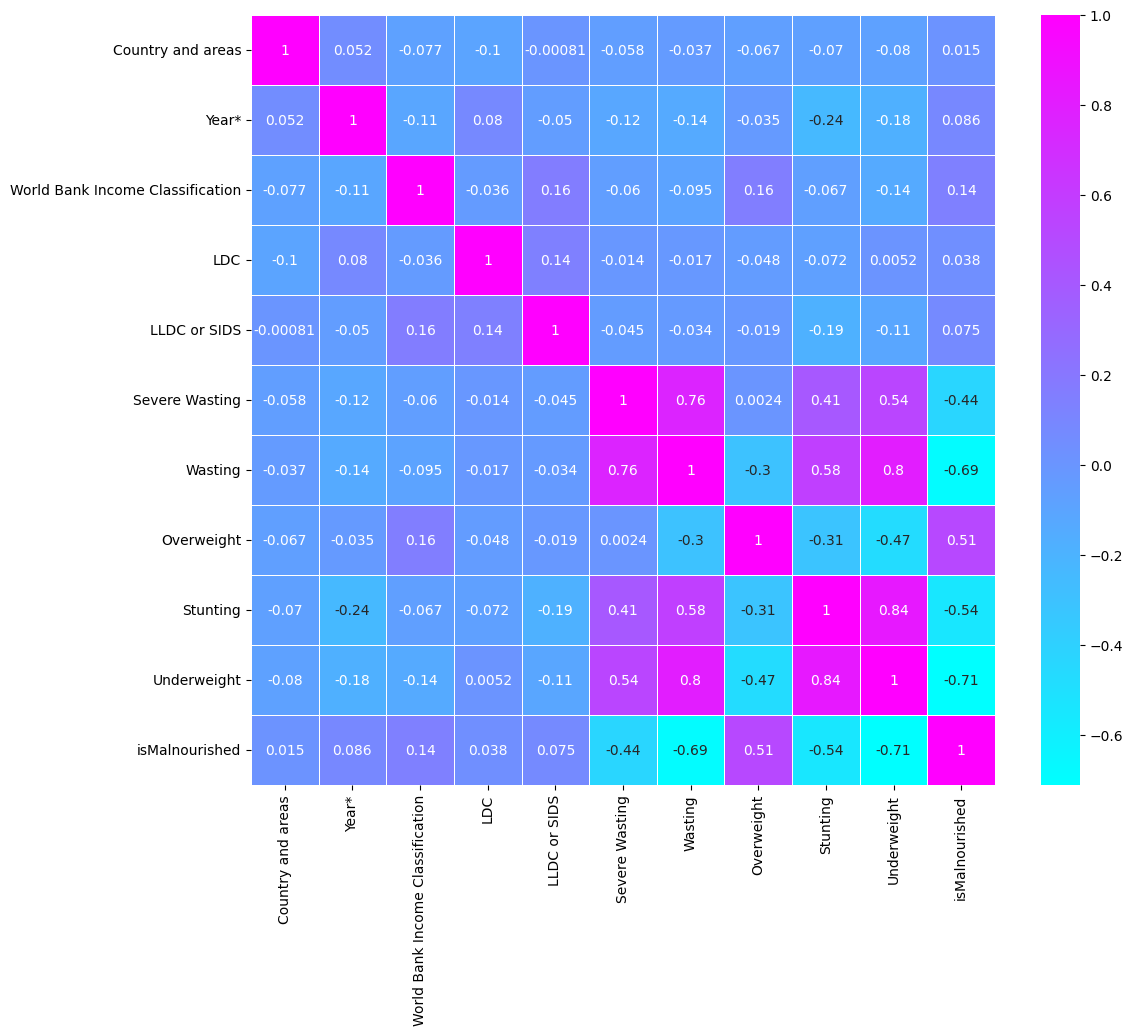

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, linewidths = .5, cmap = plt.cm.cool)

In [ ]:
df.drop(['ISO code', 'Survey year' ,'Year*'], axis = 1, inplace = True)


In [ ]:
df.drop([ 'Country and areas', 'LDC', 'Underweight' ], axis = 1, inplace = True)

In [ ]:
df_uniques = df.nunique()
df_uniques

World Bank Income Classification      4
LLDC or SIDS                          2
Severe Wasting                       77
Wasting                             191
Overweight                          175
Stunting                            475
isMalnourished                        2
dtype: int64

In [ ]:
df.head()

,World Bank Income Classification,LLDC or SIDS,Severe Wasting,Wasting,Overweight,Stunting,isMalnourished
0,1,0,2.003316,18.2,6.5,53.2,0
1,1,0,3.500000,8.6,4.6,59.3,0
2,1,0,4.000000,9.5,5.3,40.4,0
3,1,0,1.600000,5.1,4.1,38.2,0
4,2,0,1.800000,7.7,1.7,61.1,0


In [ ]:
labels = df.loc[:, ~df.columns.str.contains('isMalnourished')]
labels

,World Bank Income Classification,LLDC or SIDS,Severe Wasting,Wasting,Overweight,Stunting
0,1,0,2.003316,18.2,6.5,53.2
1,1,0,3.500000,8.6,4.6,59.3
2,1,0,4.000000,9.5,5.3,40.4
3,1,0,1.600000,5.1,4.1,38.2
4,2,0,1.800000,7.7,1.7,61.1
...,...,...,...,...,...,...
992,2,0,0.500000,2.4,3.5,35.1
993,2,0,0.800000,3.2,5.8,32.2
994,2,0,0.700000,3.2,3.6,27.6
995,2,0,1.100000,3.3,5.6,27.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   World Bank Income Classification  997 non-null    int64  
 1   LLDC or SIDS                      997 non-null    int64  
 2   Severe Wasting                    997 non-null    float64
 3   Wasting                           997 non-null    float64
 4   Overweight                        997 non-null    float64
 5   Stunting                          997 non-null    float64
 6   isMalnourished                    997 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 54.6 KB


In [ ]:
target = df['isMalnourished']
target

0      0
1      0
2      0
3      0
4      0
      ..
992    1
993    1
994    1
995    1
996    1
Name: isMalnourished, Length: 997, dtype: int64

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(labels,target,test_size = 0.2, random_state=42)

In [ ]:
train_X.shape

(797, 6)

In [ ]:
train_Y

743    0
286    0
165    1
958    0
493    0
      ..
106    1
270    0
860    1
435    1
102    1
Name: isMalnourished, Length: 797, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   World Bank Income Classification  997 non-null    int64  
 1   LLDC or SIDS                      997 non-null    int64  
 2   Severe Wasting                    997 non-null    float64
 3   Wasting                           997 non-null    float64
 4   Overweight                        997 non-null    float64
 5   Stunting                          997 non-null    float64
 6   isMalnourished                    997 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 54.6 KB


#logistic regression


In [ ]:
model1 = LogisticRegression()
model1.fit(train_X, train_Y)
logistic_Prediction = model1.predict(test_X)
precision = precision_score(test_Y, logistic_Prediction)
recall = recall_score(test_Y, logistic_Prediction)
f1 = f1_score(test_Y, logistic_Prediction)
acc = accuracy_score(test_Y, logistic_Prediction)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.94
Precision:  0.96
Recall:  0.9230769230769231
F1-score:  0.9411764705882353


#knn

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,  weights='distance')
knn = knn.fit(train_X, train_Y)
y_pred_knn = knn.predict(test_X)
a = accuracy_score(test_Y,y_pred_knn)
precision = precision_score(test_Y, logistic_Prediction)
recall = recall_score(test_Y, logistic_Prediction)
f1 = f1_score(test_Y, logistic_Prediction)
print("Accuracy: ", a)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.95
Precision:  0.96
Recall:  0.9230769230769231
F1-score:  0.9411764705882353


#Random Forest

In [ ]:
model3 = RandomForestClassifier(n_estimators = 10, criterion = "entropy", max_depth = 2)
model3.fit(train_X, train_Y)
y_pred = model3.predict(test_X)
acc = accuracy_score(test_Y, y_pred)
precision = precision_score(test_Y, logistic_Prediction)
recall = recall_score(test_Y, logistic_Prediction)
f1 = f1_score(test_Y, logistic_Prediction)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.945
Precision:  0.96
Recall:  0.9230769230769231
F1-score:  0.9411764705882353


In [ ]:
cm = confusion_matrix(test_Y, y_pred)
cm

array([[96,  0],
       [11, 93]])

Text(95.72222222222221, 0.5, 'Actual')

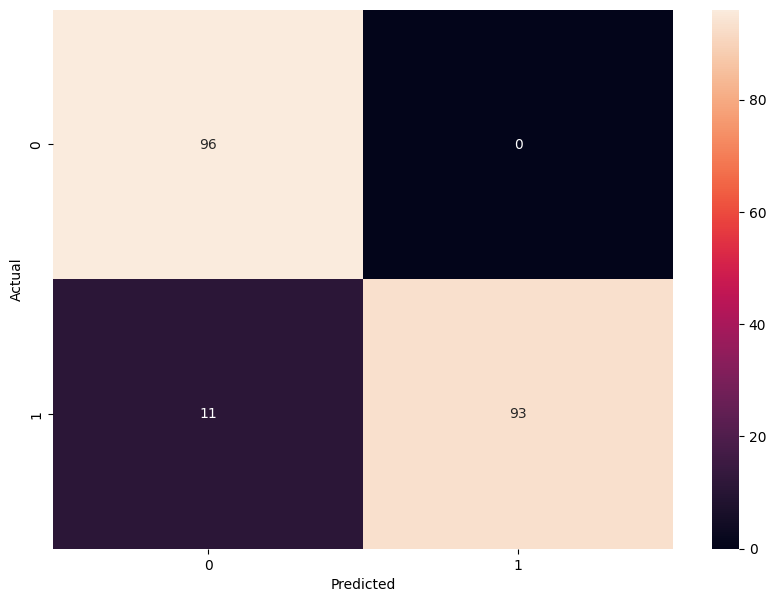

In [ ]:
%matplotlib inline
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#DECISION TREES

In [ ]:
model4 = DecisionTreeClassifier(splitter = 'random', max_depth = 3)
model4.fit(train_X, train_Y)
y_pred = model3.predict(test_X)
acc = accuracy_score(test_Y, y_pred)
print(acc)

0.945


In [ ]:
cm = confusion_matrix(test_Y, y_pred)
cm

array([[96,  0],
       [11, 93]])

In [ ]:
def isOverfit(sc):
  mean_score = sc.mean()
  std_score = sc.std()
  if mean_score - 2 * std_score > 0.9:
    print("The model is overfitting.")
  else:
    print("The model is not overfitting.")

In [ ]:
scores1 = cross_val_score(model1, test_X, test_Y, cv=5)
scores2 = cross_val_score(knn, test_X, test_Y, cv=5)
scores3 = cross_val_score(model3, test_X, test_Y, cv=5)
scores4 = cross_val_score(model4, test_X, test_Y, cv=5)
isOverfit(scores1)
isOverfit(scores2)
isOverfit(scores3)
isOverfit(scores4)

The model is not overfitting.
The model is not overfitting.
The model is overfitting.
The model is not overfitting.


In [ ]:
k = LogisticRegression()
k.fit(labels, target)


LogisticRegression()

In [ ]:
joblib.dump(k, "JME_Country_Estimates_April_2021.xlsx")
model = joblib.load("JME_Country_Estimates_April_2021.xlsx")


In [ ]:
pred = model.predict([[1, 0, 2.003316, 18.2, 6.5, 53.2]])
if pred == 1:
  print('Malnourished')
else:
  print('Not Malnourished')

Not Malnourished


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
mapping1 = dict(zip(le_WorldBankIncomeClassification.classes_, range(0, len(le_WorldBankIncomeClassification.classes_))))
with open('mapping1.pkl', 'wb') as f1:
  pickle.dump(mapping1, f1)

In [ ]:
mapping2 = dict(zip(le_LLDCorSIDS.classes_, range(0, len(le_LLDCorSIDS.classes_))))
with open('mapping2.pkl', 'wb') as f2:
  pickle.dump(mapping2, f2)

In [ ]:
def Income_class(income, LOS, stunting, wasting, overweight, severewasting):
  selected_option = income
  inc = mapping1[income]
  los  = mapping2[LOS]
  model = joblib.load("child_malnutrition")
  pred = model.predict([[inc, los, severewasting, wasting, overweight,stunting]])
  if pred == 1:
    return 'Malnourished'
  else:
    return 'Not Malnourished'

Income_dropdown = ['Low Income', 'Lower Middle Income', 'Upper Middle Income','High Income']
LOS = gr.inputs.Radio(['Landlocked developing countries (LLDCs)', 'Small island developing States (SIDS)'], label="LLDC or SIDS")
stunting = gr.inputs.Number(label="Stunting")
wasting = gr.inputs.Number(label="Wasting")
overweight = gr.inputs.Number(label="Overweight")
severewasting = gr.inputs.Number(label="SevereWasting")
drop_I = gr.inputs.Dropdown(choices=Income_dropdown)
interface = gr.Interface(fn = Income_class,inputs = [drop_I, LOS, stunting, wasting, overweight, severewasting ],  outputs = "text")
interface.launch()

<ipython-input-67-6e1eef63d6eb>:13: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  LOS = gr.inputs.Radio(['Landlocked developing countries (LLDCs)', 'Small island developing States (SIDS)'], label="LLDC or SIDS")
<ipython-input-67-6e1eef63d6eb>:13: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  LOS = gr.inputs.Radio(['Landlocked developing countries (LLDCs)', 'Small island developing States (SIDS)'], label="LLDC or SIDS")
<ipython-input-67-6e1eef63d6eb>:14: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  stunting = gr.inputs.Number(label="Stunting")
<ipython-input-67-6e1eef63d6eb>:14: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  stunting = gr.inputs.Number(label="Stunting")
<ipython-input-6

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
#!pip install -q gradio